<a href="https://colab.research.google.com/github/SahilBharodiya/COVID_19_prediction_through_CT_scans/blob/main/Covid_19_Prediction_through_CT_scans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  #Array releted work
import pandas as pd  # For reading csv files
import matplotlib.pyplot as plt  #For ploting images
from sklearn.model_selection import train_test_split  #Deviding data in training and testing
import tensorflow as tf  #For neural network
from tensorflow import keras  #For training and testing neural network
import random  #To assume numbers

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Models/Covid/covid-19_data.csv")  # Reading csv file

In [3]:
X = data.drop(columns=['status', 'Unnamed: 0'])  # Features data
y = data['status']  # Label data

In [4]:
# Converting into NumPy array
X = np.array(X)
y = np.array(y)

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2) # Deviding data into training and testing

In [6]:
# Our Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30000,)),
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(2, activation='softmax')
])

In [7]:
# Compiling Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               7680256   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 3

In [8]:
history = model.fit(train_X, train_y, epochs=100, 
                    validation_data=(test_X, test_y))

Epoch 1/100
62/62 [==============================] - 1s 9ms/step - loss: 1.1115 - accuracy: 0.5312 - val_loss: 1.3860 - val_accuracy: 0.5412
Epoch 2/100
62/62 [==============================] - 0s 6ms/step - loss: 0.7134 - accuracy: 0.6477 - val_loss: 0.6245 - val_accuracy: 0.6358
Epoch 3/100
62/62 [==============================] - 0s 6ms/step - loss: 0.6100 - accuracy: 0.6825 - val_loss: 0.6061 - val_accuracy: 0.6640
Epoch 4/100
62/62 [==============================] - 0s 6ms/step - loss: 0.5607 - accuracy: 0.7077 - val_loss: 0.5068 - val_accuracy: 0.7465
Epoch 5/100
62/62 [==============================] - 0s 6ms/step - loss: 0.6599 - accuracy: 0.6562 - val_loss: 0.5989 - val_accuracy: 0.6861
Epoch 6/100
62/62 [==============================] - 0s 6ms/step - loss: 0.5974 - accuracy: 0.7051 - val_loss: 0.5015 - val_accuracy: 0.7505
Epoch 7/100
62/62 [==============================] - 0s 6ms/step - loss: 0.5467 - accuracy: 0.7243 - val_loss: 0.5573 - val_accuracy: 0.7203
Epoch 8/100
6

In [9]:
# Calculating accuracy
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)
print("Test accuracy :", '%0.2f' % (test_acc*100), "%")

16/16 - 0s - loss: 0.5498 - accuracy: 0.8310
Test accuracy : 83.10 %


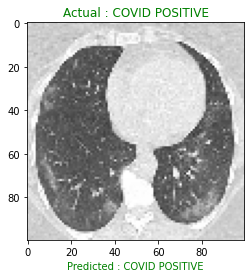

In [10]:
# Preedicting result
COLOR = 'green'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
class_names = ['COVID NEGATIVE', 'COVID POSITIVE']

def predict(model, image, correct_label):
    
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    tmp = img.reshape(100, 100, 3)
    plt.figure()
    plt.imshow(tmp, cmap=plt.cm.binary)
    plt.title("Actual : " + label)
    plt.xlabel("Predicted : " + guess)
    plt.grid(False)
    plt.show()

t = random.randint(0, len(test_X))
image = test_X[t]
label = test_y[t]
predict(model, image, label)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [12]:
import cv2

In [17]:
img1 = cv2.imread('image-1.png')
img2 = cv2.imread('image-2.jpg')

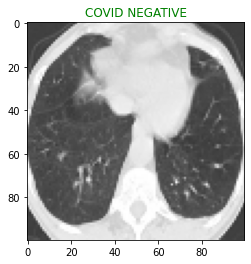

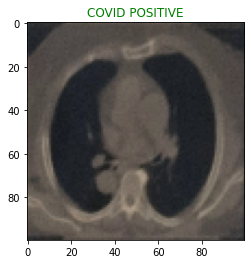

In [22]:
def predict_on_new_data(img):
    img = cv2.resize(img, (100, 100))
    img = img / 255.0
    p = np.argmax(model.predict(np.array([img.flatten()])))
    plt.figure()
    plt.title(class_names[p])
    plt.imshow(img)

predict_on_new_data(img1)
predict_on_new_data(img2)